In [22]:
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

In [161]:
# # bring in the 311 data

# data311_df = pd.read_csv("../Clean Data Files/modelstartdata.csv")


# print(data311_df.columns.values)
# # print(data311_df["sr create date"])
# data311_df.head()

['index' 'case number' 'sr location' 'county' 'district' 'neighborhood'
 'tax id' 'trash quad' 'recycle quad' 'trash day' 'heavy trash day'
 'recycle day' 'key map' 'management district' 'department' 'division'
 'sr type' 'queue' 'sla' 'status' 'sr create date' 'due date'
 'date closed' 'overdue' 'title' 'x' 'y' 'latitude' 'longitude'
 'channel type' 'zipcode' 'openclosetime' 'openduetime' 'year']


,index,case number,sr location,county,district,neighborhood,tax id,trash quad,recycle quad,trash day,...,title,x,y,latitude,longitude,channel type,zipcode,openclosetime,openduetime,year
0,6,12091836-101002444730,"3303 SAGE, HOUSTON TX 77056",HARRIS,G,GREATER UPTOWN,4.514000e+11,NaN,NaN,NaN,...,Water Leak-101002444730,3089853.524,13831195.74,29.733522,-95.466104,Voice In,77056,32 days 12:49:18.000000000,9 days 23:59:59.000000000,2017
1,12,12091839-101002444736,"7701 APPLETON, HOUSTON TX 77022",HARRIS,H,NORTHSIDE/NORTHLINE,7.102100e+11,NE,NW,MONDAY,...,Sewer Wastewater-101002444736,3119884.277,13867666.56,29.831239,-95.367955,Voice In,77022,3 days 05:37:27.000000000,0 days 23:59:58.000000000,2017
2,13,12091840-101002444737,"7701 APPLETON, HOUSTON TX 77022",HARRIS,H,NORTHSIDE/NORTHLINE,4.200500e+11,NE,NW,MONDAY,...,Water Service-101002444737,3119785.781,13867661.60,29.831234,-95.368266,Voice In,77022,2 days 22:16:31.000000000,2 days 00:00:00.000000000,2017
3,15,12091841-101002444739,"7612 APPLETON, HOUSTON TX 77022",HARRIS,H,NORTHSIDE/NORTHLINE,7.102100e+11,NE,NW,MONDAY,...,Water Service-101002444739,3120069.146,13867375.14,29.830423,-95.367401,Voice In,77022,0 days 02:26:29.000000000,1 days 23:59:59.000000000,2017
4,23,12091843-101002444752,"7335 IWO JIMA, HOUSTON TX 77033",HARRIS,D,SOUTH PARK,7.518900e+11,SE,SE,FRIDAY,...,Water Leak-101002444752,3128978.891,13812277.81,29.678215,-95.344744,Voice In,77033,0 days 02:34:10.000000000,10 days 00:00:00.000000000,2017


In [162]:
# ################################################################
# # create a date value formatted the same as the weather data

# splitdate = data311_df["sr create date"].str.split(" ", n=1, expand=True)

# data311_df["create_date"] = splitdate[0]
# data311_df["create_date"] = pd.to_datetime(data311_df["create_date"])
# data311_df["create_date"] = data311_df['create_date'].dt.strftime('%Y-%m-%d')

# ##################################################################
# # below is where I create the variables that I can use for modeling. I originally was trying to use the openclose time
# # columns, but couldn't get it to just show the number of days.

# data311.head()

# type(data311_df["sr create date"])

# # I set these as date formats using the to_datetime

# data311_df["create_date_time"] = pd.to_datetime(data311_df["sr create date"])
# data311_df["date_closed_time"] = pd.to_datetime(data311_df["date closed"])
# data311_df["due_date_time"] = pd.to_datetime(data311_df["due date"])


# # here  I define weather is was closed by the due date (0) or not (1)
# data311_df["missed_due_date"] = np.where(data311_df["due_date_time"] > data311_df["date_closed_time"], 0, 1)

# # calculate the difference between the closed date at the create date
# data311_df["time_to_close"] = data311_df["date_closed_time"] - data311_df["create_date_time"]

# # apply formatting so that is is in seconds. then calculate the number of days.
# data311_df["seconds_to_close"] = data311_df["time_to_close"].astype('timedelta64[s]')
# data311_df["days_to_close"] = data311_df["seconds_to_close"]/60/60/24
 
# # data311_df[["create_date_time", "date_closed_time", "time_to_close","seconds_to_close", "days_to_close"]]


# data311_df[["create_date_time","due_date_time", "date_closed_time", "missed_due_date", "days_to_close"]]



,create_date_time,due_date_time,date_closed_time,missed_due_date,days_to_close
0,2017-01-01 00:30:00,2017-01-11 00:30:00,2017-02-02 13:20:00,1,32.534722
1,2017-01-01 05:22:00,2017-01-02 05:22:00,2017-01-04 11:00:00,1,3.234722
2,2017-01-01 05:23:00,2017-01-03 05:23:00,2017-01-04 03:40:00,1,2.928472
3,2017-01-01 06:43:00,2017-01-03 06:43:00,2017-01-01 09:10:00,0,0.102083
4,2017-01-01 08:45:00,2017-01-11 08:45:00,2017-01-01 11:20:00,0,0.107639
5,2017-01-01 09:49:00,2017-01-02 09:49:00,2017-01-01 12:00:00,0,0.090972
6,2017-01-01 10:23:00,2017-01-11 10:23:00,2017-01-01 12:55:00,0,0.105556
7,2017-01-01 10:30:00,2017-01-02 10:30:00,2017-01-12 02:50:00,1,10.680556
8,2017-01-01 10:56:00,2017-01-02 10:56:00,2017-01-02 16:10:00,1,1.218056
9,2017-01-01 11:04:00,2017-01-02 11:04:00,2017-01-04 03:35:00,1,2.688194


In [163]:
# # bring in the weather data

# weatherdata_df = pd.read_csv("../static/data/Final_selected_weather_data.csv")

# print(weatherdata_df.shape)
# weatherdata_df.head()

# # checking the date lenght to make sure it matches with the 311 date length

# # weatherdata_df["date_len"] = weatherdata_df["date_field"].str.len() 
# # print(weatherdata_df[["date_field", "date_len"]])


(1180, 6)


,Unnamed: 0,date_field,tempMax,tempAvg,tempMin,precipitation
0,0,2017-01-01,74,67.5,64,0.30
1,1,2017-01-02,74,66.9,53,0.07
2,2,2017-01-03,75,61.9,49,1.22
3,3,2017-01-04,52,46.5,42,0.00
4,4,2017-01-05,56,50.4,44,0.00


In [164]:
# # bring in the census data

# censusdata_df = pd.read_csv("../Clean Data Files/census_data.csv")
# censusdata_df.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Total Households,Total Owner Occupied,% Owner Occupied
0,77002,12370.0,34.1,72306.0,34779.0,6.984640,4457.0,1213.0,27.215616
1,77003,9646.0,34.1,59575.0,37760.0,27.628032,9597.0,4731.0,49.296655
2,77004,37642.0,28.3,48592.0,31067.0,19.733277,28125.0,9997.0,35.544889
3,77005,28233.0,36.5,180758.0,100896.0,3.715510,25438.0,20433.0,80.324711
4,77006,21945.0,34.3,82878.0,68705.0,7.304625,21280.0,8945.0,42.034774


In [17]:
# # merge weather data into the 311 data

# data_all1_df = data311_df.merge(weatherdata_df, how="left", left_on="create_date", right_on="date_field")

# print(data_all1_df.shape)
# data_all1_df.head()

# # print(data_all[data_all["date_field"] == "2017-01-04"])

In [241]:
# data_final_df = data_all1_df.merge(censusdata_df, how="left", left_on="zipcode", right_on="Zipcode") 

# print(data_final_df.shape)

# data_final_df = data_final_df.drop(columns=["Zipcode","date_field"])

# print(data_final_df.columns.values)
# # data_final_df.head()

# data_final_df.describe()

# data_final_df.isna().sum()

# print(data_final_df[data_final_df["district"].isna()])

(861, 57)
['index' 'case number' 'sr location' 'county' 'district' 'neighborhood'
 'tax id' 'trash quad' 'recycle quad' 'trash day' 'heavy trash day'
 'recycle day' 'key map' 'management district' 'department' 'division'
 'sr type' 'queue' 'sla' 'status' 'sr create date' 'due date'
 'date closed' 'overdue' 'title' 'x' 'y' 'latitude' 'longitude'
 'channel type' 'zipcode' 'openclosetime' 'openduetime' 'year'
 'create_date' 'create_date_time' 'date_closed_time' 'due_date_time'
 'missed_due_date' 'time_to_close' 'seconds_to_close' 'days_to_close'
 'Unnamed: 0' 'tempMax' 'tempAvg' 'tempMin' 'precipitation' 'Population'
 'Median Age' 'Household Income' 'Per Capita Income' 'Poverty Rate'
 'Total Households' 'Total Owner Occupied' '% Owner Occupied']
     index            case number                                 sr location  \
55     154  12091899-101002444887  5686 GRAND FLORAL, UNINCORPORATED TX 77041   
263    735            1.01002E+11              1302 MCDUGALD, HUMBLE TX 77338   
376 

In [244]:
# keep just the fields that will be used in analysis

# data_final_df=data_final_df[["create_date","days_to_close","missed_due_date","sr type","tempMax","tempAvg","tempMin","precipitation","Population","Median Age",
#                     "Household Income","Poverty Rate","% Owner Occupied"]]

# print(data_final_df.shape)
# print(data_final_df["create_date"].value_counts())
# data_final_df.describe()

(861, 13)
2017-01-03    511
2017-01-02    203
2017-01-04     79
2017-01-01     68
Name: create_date, dtype: int64


,days_to_close,missed_due_date,tempMax,tempAvg,tempMin,precipitation,Population,Median Age,Household Income,Poverty Rate,% Owner Occupied
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,14.643768,0.319396,72.574913,62.108130,50.485482,0.764262,33776.849013,33.723926,56535.933798,20.704777,51.632477
std,37.308855,0.466514,6.559071,5.488447,4.884607,0.554872,13733.980413,3.040652,29485.480188,9.764555,13.121672
min,0.000694,0.000000,52.000000,46.500000,42.000000,0.000000,915.000000,24.400000,26644.000000,3.169474,4.864466
25%,0.536806,0.000000,74.000000,61.900000,49.000000,0.070000,22799.000000,31.900000,34842.000000,11.186171,44.026696
50%,1.378472,0.000000,75.000000,61.900000,49.000000,1.220000,32556.000000,33.800000,45953.000000,22.410745,50.140064
75%,7.795833,1.000000,75.000000,66.900000,53.000000,1.220000,39915.000000,34.900000,66775.000000,28.398222,59.136876
max,385.361111,1.000000,75.000000,67.500000,64.000000,1.220000,104582.000000,45.100000,250001.000000,39.548570,90.290089


### Read in the final version of the data that has the weather and census data merged in already.

In [28]:
data_final_df = pd.read_csv("../static/dataignore/modeldata.csv")



In [29]:
print(data_final_df.columns.values)
data_final_df.head()

['case number' 'sr location' 'county' 'district' 'neighborhood' 'tax id'
 'trash quad' 'recycle quad' 'trash day' 'heavy trash day' 'recycle day'
 'key map' 'management district' 'department' 'division' 'sr type' 'queue'
 'sla' 'status' 'sr create date' 'due date' 'date closed' 'overdue'
 'title' 'latitude' 'longitude' 'channel type' 'date' 'year' 'month'
 'zipcode' 'daystoclose' 'daysdue' 'missedduedate' 'date_field' 'tempMax'
 'tempAvg' 'tempMin' 'precipitation' 'Population' 'Median Age'
 'Household Income' 'Per Capita Income' 'Poverty Rate' 'Total Households'
 'Total Owner Occupied' '% Owner Occupied']


,case number,sr location,county,district,neighborhood,tax id,trash quad,recycle quad,trash day,heavy trash day,...,tempMin,precipitation,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Total Households,Total Owner Occupied,% Owner Occupied
0,101002444726,Intersection 3900 S GESSNER RD&10000 WESTPARK DR,Harris County,F,MID WEST,NaN,NaN,NaN,NaN,NaN,...,64.0,0.3,38931.0,31.9,44957.0,32805.0,22.824998,38751.0,9667.0,24.946453
1,12091836-101002444730,"3303 SAGE, HOUSTON TX 77056",HARRIS,G,GREATER UPTOWN,0451400060009,NaN,NaN,NaN,NaN,...,64.0,0.3,21732.0,39.1,107003.0,89180.0,5.268728,21641.0,10643.0,49.179798
2,101002444733,Intersection 1400 CAROLINE ST&1300 CLAY ST,Harris County,I,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,...,64.0,0.3,915.0,44.6,250001.0,196722.0,6.666667,915.0,78.0,8.524590
3,12091839-101002444736,"7701 APPLETON, HOUSTON TX 77022",HARRIS,H,NORTHSIDE/NORTHLINE,0710210010015,NE,NW,MONDAY,3rd Monday,...,64.0,0.3,27364.0,34.1,30164.0,14924.0,29.399942,27186.0,13143.0,48.344736
4,12091840-101002444737,"7701 APPLETON, HOUSTON TX 77022",HARRIS,H,NORTHSIDE/NORTHLINE,0420050000055,NE,NW,MONDAY,3rd Monday,...,64.0,0.3,27364.0,34.1,30164.0,14924.0,29.399942,27186.0,13143.0,48.344736


In [30]:
################################################################
# create a date value formatted the same as the weather data

splitdate = data_final_df["sr create date"].str.split(" ", n=1, expand=True)

data_final_df["create_date"] = splitdate[0]
data_final_df["create_date"] = pd.to_datetime(data_final_df["create_date"])
data_final_df["create_date"] = data_final_df['create_date'].dt.strftime('%Y-%m-%d')


# I set these as date formats using the to_datetime

data_final_df["create_date_time"] = pd.to_datetime(data_final_df["sr create date"])
data_final_df["date_closed_time"] = pd.to_datetime(data_final_df["date closed"])
data_final_df["due_date_time"] = pd.to_datetime(data_final_df["due date"])


# here  I define weather is was closed by the due date (0) or not (1)
data_final_df["missed_due_date"] = np.where(data_final_df["due_date_time"] > data_final_df["date_closed_time"], 0, 1)

# calculate the difference between the closed date at the create date
data_final_df["time_to_close"] = data_final_df["date_closed_time"] - data_final_df["create_date_time"]

# apply formatting so that is is in seconds. then calculate the number of days.
data_final_df["seconds_to_close"] = data_final_df["time_to_close"].astype('timedelta64[s]')
data_final_df["days_to_close"] = data_final_df["seconds_to_close"]/60/60/24
 
# data311_df[["create_date_time", "date_closed_time", "time_to_close","seconds_to_close", "days_to_close"]]


data_final_df[["create_date_time","due_date_time", "date_closed_time", "missed_due_date", "days_to_close"]]

data_final_df[data_final_df["days_to_close"]>500]

,case number,sr location,county,district,neighborhood,tax id,trash quad,recycle quad,trash day,heavy trash day,...,Total Owner Occupied,% Owner Occupied,create_date,create_date_time,date_closed_time,due_date_time,missed_due_date,time_to_close,seconds_to_close,days_to_close
9447,101002463965,"2110 REID, HOUSTON TX 77026",HARRIS,H,EASTEX - JENSEN AREA,0660550150027,NE,NE,MONDAY,2nd Friday,...,10573.0,46.651077,2017-01-18,2017-01-18 11:07:21,2019-08-20 16:53:00,2019-08-30 16:52:00,0,944 days 05:45:39,81582339.0,944.240035
17725,101002479791,"5810 VALKEITH, HOUSTON TX 77096",HARRIS,C,MEYERLAND AREA,0936030000002,SW,SW,TUESDAY,2nd Wednesday,...,18129.0,51.154063,2017-01-27,2017-01-27 13:53:18,2018-08-21 16:47:25,2018-08-31 16:47:00,0,571 days 02:54:07,49344847.0,571.120914
69208,101002589609,"5718 YARWELL, HOUSTON TX 77096",HARRIS,C,MEYERLAND AREA,0935940000015,SW,SW,TUESDAY,2nd Wednesday,...,18129.0,51.154063,2017-05-02,2017-05-02 20:40:36,2019-12-13 17:50:59,2019-12-23 17:50:00,0,954 days 21:10:23,82501823.0,954.882211
71738,101002595026,"8911 W HARDY, HOUSTON TX 77022",HARRIS,H,NORTHSIDE/NORTHLINE,0701170010051,NE,NW,MONDAY,3rd Monday,...,13143.0,48.344736,2017-05-08,2017-05-08 09:47:49,2018-09-28 10:31:24,2017-06-08 09:47:00,1,508 days 00:43:35,43893815.0,508.030266
71942,101002595461,"8036 FURRAY, HOUSTON TX 77028",HARRIS,B,SETTEGAST,1266530010013,NE,NW,THURSDAY,2nd Monday,...,8622.0,54.896218,2017-05-08,2017-05-08 13:05:34,2019-01-19 09:31:38,2017-06-08 13:05:00,1,620 days 20:26:04,53641564.0,620.851435
72026,101002595670,"7445 GLEASON, HOUSTON TX 77016",HARRIS,B,EAST LITTLE YORK / HOMESTEAD,0825100000020,NE,NW,TUESDAY,2nd Tuesday,...,18968.0,64.198199,2017-05-08,2017-05-08 14:45:57,2019-01-19 09:36:11,2017-06-08 14:45:00,1,620 days 18:50:14,53635814.0,620.784884
72088,101002595843,"4910 FITCH, HOUSTON TX 77016",HARRIS,B,TRINITY / HOUSTON GARDENS,0731790000144,NE,NW,TUESDAY,2nd Tuesday,...,18968.0,64.198199,2017-05-08,2017-05-08 15:54:07,2019-01-19 09:38:45,2017-06-08 15:54:00,1,620 days 17:44:38,53631878.0,620.739329
72102,101002595885,"4215 PLAAG, HOUSTON TX 77016",HARRIS,B,TRINITY / HOUSTON GARDENS,0720760010025,NE,NW,TUESDAY,2nd Tuesday,...,18968.0,64.198199,2017-05-08,2017-05-08 16:12:28,2019-01-19 09:41:36,2017-06-08 16:12:00,1,620 days 17:29:08,53630948.0,620.728565
73577,101002599173,"8313 SPAULDING, HOUSTON TX 77016",HARRIS,B,TRINITY / HOUSTON GARDENS,0730710070153,NE,NW,TUESDAY,2nd Tuesday,...,18968.0,64.198199,2017-05-11,2017-05-11 10:40:33,2019-01-19 09:30:50,2017-06-08 10:40:00,1,617 days 22:50:17,53391017.0,617.951586
73721,101002599566,"609 PARKER, HOUSTON TX 77076",HARRIS,H,NORTHSIDE/NORTHLINE,0750680150335,NE,NW,MONDAY,3rd Monday,...,17541.0,50.140064,2017-05-11,2017-05-11 14:28:40,2019-01-19 09:35:03,2017-06-08 14:28:00,1,617 days 19:06:23,53377583.0,617.796100


In [62]:
# keep just the fields that will be used in analysis

data_final_df=data_final_df[["create_date","days_to_close","missed_due_date","sr type","tempMax","precipitation","Population","Median Age",
                    "Household Income","Poverty Rate","% Owner Occupied"]]

data_final_df = data_final_df.dropna()
data_final_df.isna().sum()

data_final_df["sr type"].value_counts()

data_final_df=data_final_df[data_final_df["create_date"] >= "2019-01-01"  ]

In [63]:
data_final_df.describe()

# data_final_df[data_final_df["days_to_close"]>500].shape

data_final_df.shape

(227068, 11)

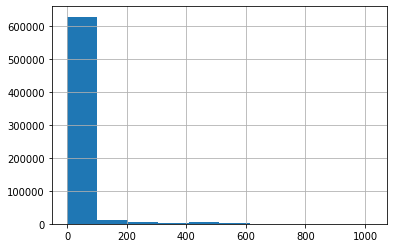

In [8]:
data_final_df["days_to_close"].hist()

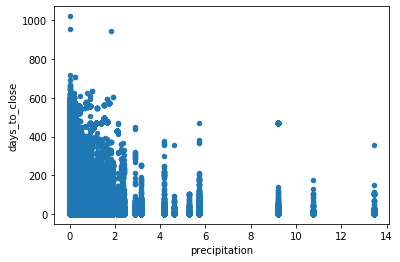

In [9]:
data_final_df.plot.scatter(x="precipitation", y="days_to_close")

In [64]:

# need to create dummy variable for the "sr type" column, which is categorical

data_dummies_df=pd.get_dummies(data_final_df["sr type"])



# add dummy variables in to dataframe with other variables

data_regress_df=pd.concat([data_final_df, data_dummies_df], axis=1)   

# create y variable for the regression analysis

y=data_final_df["days_to_close"].values.reshape(-1,1)


# create x variables (easier to just drop columns that aren't needed)

X_var=data_regress_df.drop(columns=["sr type","days_to_close", "missed_due_date","create_date"])
X_var.isna().sum()
 
print(X_var.shape)
print(X_var.columns.values)
X_var.head()  


# Here I am looking at droppiing some of the x variables to see how it affects the model

# X_var=X_var[["tempMax","precipitation", "Household Income","Poverty Rate","% Owner Occupied"]]


# X_var=X_var[['Drainage' ,'Missed Garbage Pickup', 'Missed Heavy Trash Pickup',
#  'Missed Recycling Pickup', 'Nuisance On Property', 'SWM Escalation',
#  'Sewer Wastewater', 'Storm Debris Collection', 'Street Condition',
#  'Street Hazard', 'Traffic Signal Maintenance', 'Traffic Signs', 'Water Leak',
#  'Water Service']]

X_var=X_var[['tempMax']]



(227068, 22)
['tempMax' 'precipitation' 'Population' 'Median Age' 'Household Income'
 'Poverty Rate' '% Owner Occupied' 'Container Problem' 'Drainage'
 'Missed Garbage Pickup' 'Missed Heavy Trash Pickup'
 'Missed Recycling Pickup' 'Nuisance On Property' 'SWM Escalation'
 'Sewer Wastewater' 'Storm Debris Collection' 'Street Condition'
 'Street Hazard' 'Traffic Signal Maintenance' 'Traffic Signs' 'Water Leak'
 'Water Service']


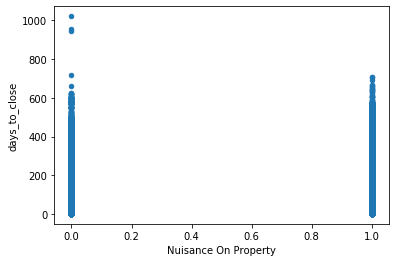

In [11]:
data_regress_df.plot.scatter(x="Nuisance On Property", y="days_to_close")

### Build regression model to predict number of days until issue was closed

In [65]:
from sklearn.model_selection import train_test_split

# random_state is just an arbitrarily selected number that we use to maintain the same random split each time we run this cell.
X_train, X_test, y_train, y_test = train_test_split(X_var, y, random_state=5)



In [66]:
# scale the data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [67]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [68]:
from sklearn.linear_model import LinearRegression

# Create a linear model
model_regress = LinearRegression()

model_regress.fit(X_train_scaled, y_train_scaled)

print(f"Training Score:  {model_regress.score(X_train_scaled, y_train_scaled)}")
print(f"Test Score: {model_regress.score(X_test_scaled, y_test_scaled)}")

Training Score:  0.0036017563310234424
Test Score: 0.0030182138380508983


In [69]:
print('Weight coefficients: ', model_regress.coef_)
print('y-axis intercept: ', model_regress.intercept_) 

Weight coefficients:  [[0.06001463]]
y-axis intercept:  [-4.17996471e-17]


In [70]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model_regress.predict(X_train_scaled)

# Score the prediction with mse and r2
mse = mean_squared_error(y_train_scaled, predicted)
r2 = r2_score(y_train_scaled, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.9963982436689762
R-squared (R2 ): 0.0036017563310234424


In [71]:
model_regress.score(X_test_scaled, y_test_scaled)

0.0030182138380508983

In [72]:
# look at residuals

res = predicted - y_train_scaled

res


array([[ 0.25094338],
       [ 0.32547472],
       [-0.61976022],
       ...,
       [ 0.19552282],
       [ 0.21457466],
       [-0.30624908]])

(array([1.58048e+05, 4.08700e+03, 9.88000e+02, 1.31800e+03, 7.73000e+02,
        1.67000e+03, 2.36500e+03, 9.81000e+02, 6.30000e+01, 8.00000e+00]),
 array([-0.33670563,  0.51329823,  1.36330209,  2.21330594,  3.0633098 ,
         3.91331366,  4.76331751,  5.61332137,  6.46332523,  7.31332909,
         8.16333294]),
 <a list of 10 Patch objects>)

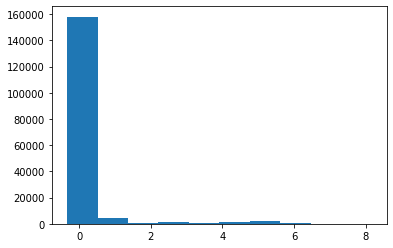

In [73]:
plt.hist(y_train_scaled)

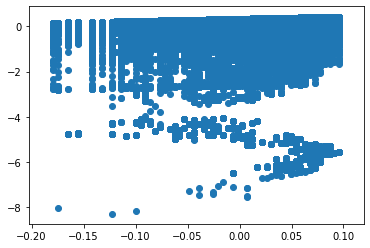

In [75]:
plt.scatter(predicted, res)

In [14]:
# output model to pickle

import pickle

with open('../static/models/regression_model.pkl','wb') as f:
    pickle.dump(model_regress, f)

### Build Logistic Regression Model to predict if issue was not closed by due date

In [76]:
# I need to define y as the classfication variable.  The X_var can stay the same

y_class = data_final_df["missed_due_date"]

In [77]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
# define training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_class_train, y_class_test = train_test_split(X_var, y_class, random_state=33)


In [79]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)


In [80]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [81]:
classifier.fit(X_train_scaled, y_class_train)

C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_class_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_class_test)}")

Training Data Score: 0.655151760706044
Testing Data Score: 0.6612292352951539


#### Do a grid search to try and find best model

In [19]:
logistic = LogisticRegression()

In [20]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [23]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [24]:
# Fit grid search
best_model = clf.fit(X_train_scaled, y_class_train)

C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeickholt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

In [25]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


#### Ends up the that grid search showed the default values were best

In [77]:
# output model to pickle

import pickle

with open('../static/models/logistic_model.pkl','wb') as f:
    pickle.dump(classifier, f)

### Develop KNN model to predict if issue was not closed by due date

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_class_train)
print('k=5 Test Acc: %.3f' % knn.score(X_train, y_class_train))
knn

k=5 Test Acc: 0.655


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
# output model using pickle

import pickle

with open('../static/models/knn_model.pkl','wb') as f:
    pickle.dump(knn, f)